In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
os.add_dll_directory(r"C:\Program Files\dji_thermal_sdk_v1.8_20250829\tsdk-core\lib\windows\release_x64")   # ← your SDK bin folder


from dji_thermal_sdk.dji_sdk import *
from dji_thermal_sdk.utility import rjpeg_to_heatmap, rjpeg_to_thermal
import dji_thermal_sdk.dji_sdk as DJI
import ctypes as CT
from ctypes import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from dji_thermal_sdk.dji_sdk import *
import dji_thermal_sdk.dji_sdk as DJI

# 1. Initialisez le SDK en pointant vers le dossier contenant vos DLLs
# Si les DLLs sont dans le dossier courant :
DJI.dji_init(dllpath="libdirp.dll") 

# 2. Vérifiez que la bibliothèque est bien chargée
print(DJI._libdirp)



<CDLL 'libdirp.dll', handle 7fff83b70000 at 0x1dfae43f5d0>


In [3]:
rd = r"C:\Users\Vasco Zanchi\Desktop\bicwin26\DJI_20260128212550_0002_T.JPG"
with open(rd, 'rb') as f:
    content = f.read()
    print(len(content))
# method1 to get the file size
print(f"File size: {os.path.getsize(rd)}")
# method 2 to get the file size
file_stat = os.stat(rd)
size = c_int32(file_stat.st_size)
print(f"File size: {size}")

# the method to create a string buffer, which is important.
rjpeg_data = CT.create_string_buffer(len(content))
rjpeg_data.value = content
print(f"rjpeg_data: {rjpeg_data}")

# test the function to create a handle of an image
ret = dirp_create_from_rjpeg(rjpeg_data,size, CT.byref(DIRP_HANDLE))
print(f'ret = {ret}')
if ret == 0:
    print("successfully get the r-jpeg handle.")
#
print(f"DIRP_HANDLE: {DIRP_HANDLE}  address: {hex(DIRP_HANDLE.value)} ")





2641920
File size: 2641920
File size: c_long(2641920)
rjpeg_data: <ctypes.c_char_Array_2641920 object at 0x000001DFAE55F450>
ret = 0
successfully get the r-jpeg handle.
DIRP_HANDLE: c_void_p(2060194128672)  address: 0x1dfad23a320 


In [4]:
# Structure pour stocker la résolution
class dirp_resolution_t(Structure):
    _fields_ = [("width", c_int32), ("height", c_int32)]

resolution = dirp_resolution_t()
ret = dirp_get_rjpeg_resolution(DIRP_HANDLE, CT.byref(resolution))

if ret == 0:
    print(f"Résolution : {resolution.width}x{resolution.height}")

print(ret)

Résolution : 640x512
0


Ret measure: 0


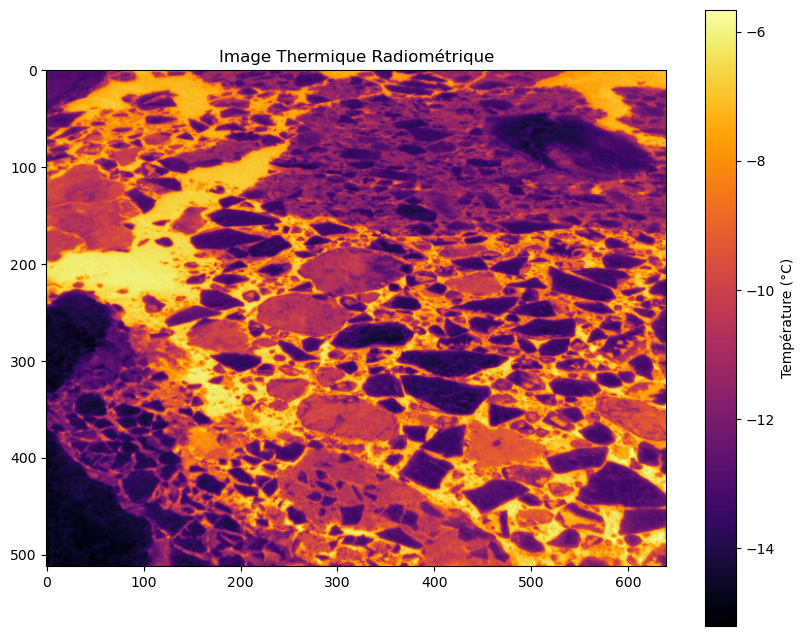

In [5]:
"""
# Créer un buffer pour stocker les températures (float32 par pixel)
temp_size = resolution.width * resolution.height
temp_buffer = (c_float * temp_size)()

"""

# 1. Calcul précis du nombre de pixels
pixel_count = resolution.width * resolution.height

# 2. Taille totale en OCTETS (4 octets par float)
temp_size_bytes = pixel_count * 4 

# 3. Création du buffer (tableau de c_float)
temp_buffer = (c_float * pixel_count)()

# 4. Appel avec la taille en OCTETS
ret = dirp_measure_ex(DIRP_HANDLE, temp_buffer, temp_size_bytes)

print(f"Ret measure: {ret}")


if ret == 0:
    # Convertir en tableau numpy et redimensionner
    temp_matrix = np.frombuffer(temp_buffer, dtype=np.float32).reshape(resolution.height, resolution.width)
    
    # Visualisation avec Matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(temp_matrix, cmap='inferno') # 'inferno', 'magma' ou 'jet' pour l'aspect thermique
    plt.colorbar(label='Température (°C)')
    plt.title("Image Thermique Radiométrique")
    plt.show()


In [6]:
print(f"Largeur: {resolution.width}, Hauteur: {resolution.height}")
temp_size = resolution.width * resolution.height
print(f"Taille du buffer demandée: {temp_size} éléments float")


Largeur: 640, Hauteur: 512
Taille du buffer demandée: 327680 éléments float


In [7]:
temp_matrix

array([[-12.752295 , -12.675909 , -12.599615 , ...,  -8.508398 ,
         -9.1862545,  -9.7903805],
       [-12.675909 , -12.599615 , -12.523352 , ...,  -7.231665 ,
         -7.4566407,  -7.531531 ],
       [-12.752295 , -12.523352 , -12.752295 , ...,  -7.231665 ,
         -7.231665 ,  -7.306494 ],
       ...,
       [-14.897955 , -14.897955 , -14.667212 , ..., -11.989904 ,
        -12.142157 , -12.21842  ],
       [-14.82102  , -14.82102  , -14.82102  , ..., -11.761572 ,
        -12.066015 , -12.066015 ],
       [-14.744085 , -14.744085 , -14.667212 , ..., -11.685553 ,
        -11.989904 , -11.989904 ]], dtype=float32)

In [8]:
ret

0